In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dataset

In [2]:
#Let's bring the full dataset

df = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Malartic_geochem_majoroxides_redone.csv')

In [3]:
df.head()

,Sample_ID,Oxidation,X,Y,Year,Type,Sample,Al2O3,CaO,Fe2O3,...,MgO,MnO,Na2O,P2O5,TiO2,Depth_m,Grain_size_group,Distance_to_pit_m,Underlying Bedrock,Bedrock_detail
0,001a,Slight,712587,5331728,2016,Surface,Surface (2016),13.3,3.82,3.43,...,1.82,0.055,3.78,0.168,0.639,0.35,Medium,2725.103005,Meta-sedimentary,"Wacke, mudrock et schiste"
1,004a,Slight,706551,5333381,2016,Surface,Surface (2016),14.2,3.56,3.52,...,1.64,0.052,3.69,0.162,0.645,0.10,Medium,6689.690932,Meta-sedimentary,"Wacke, mudrock et schiste"
2,005a,Slight,706274,5325153,2016,Surface,Surface (2016),13.0,3.42,3.06,...,1.61,0.052,3.64,0.115,0.692,0.30,Fine,11605.950470,Meta-sedimentary,"Wacke, mudrock et schiste"
3,007a,Slight,716966,5323165,2016,Surface,Surface (2016),14.2,3.02,3.77,...,1.81,0.056,3.75,0.067,1.170,0.40,Medium,10492.123050,Meta-sedimentary,"Wacke, mudrock et schiste"
4,009a,Slight,718028,5338822,2016,Surface,Surface (2016),13.4,3.50,3.81,...,1.98,0.054,3.46,0.133,0.606,0.20,Medium,4322.272920,Mafic/Ultramafic,Andésite et volcanoclastites mafiques


In [4]:
#Extracting features; dropping MnO to have just 8 features/variables

Sub_df=df[['Al2O3', 'CaO', 'Fe2O3', 'K2O', 'MgO', 'Na2O', 'P2O5', 'TiO2']].copy()   
Sub_df

,Al2O3,CaO,Fe2O3,K2O,MgO,Na2O,P2O5,TiO2
0,13.3,3.82,3.43,1.26,1.82,3.78,0.168,0.639
1,14.2,3.56,3.52,1.28,1.64,3.69,0.162,0.645
2,13.0,3.42,3.06,1.26,1.61,3.64,0.115,0.692
3,14.2,3.02,3.77,1.72,1.81,3.75,0.067,1.170
4,13.4,3.50,3.81,1.24,1.98,3.46,0.133,0.606
...,...,...,...,...,...,...,...,...
67,14.2,3.64,4.06,1.24,1.92,3.95,0.147,0.644
68,13.2,3.79,3.37,1.18,1.80,3.70,0.140,0.625
69,14.6,3.65,4.08,1.42,2.25,3.82,0.108,0.647
70,14.2,3.60,3.25,1.08,1.59,3.69,0.145,0.649


In [5]:
#Make a numpy array for easier matrix calculation

arr=Sub_df.to_numpy()    
arr

array([[13.3  ,  3.82 ,  3.43 ,  1.26 ,  1.82 ,  3.78 ,  0.168,  0.639],
       [14.2  ,  3.56 ,  3.52 ,  1.28 ,  1.64 ,  3.69 ,  0.162,  0.645],
       [13.   ,  3.42 ,  3.06 ,  1.26 ,  1.61 ,  3.64 ,  0.115,  0.692],
       [14.2  ,  3.02 ,  3.77 ,  1.72 ,  1.81 ,  3.75 ,  0.067,  1.17 ],
       [13.4  ,  3.5  ,  3.81 ,  1.24 ,  1.98 ,  3.46 ,  0.133,  0.606],
       [13.7  ,  3.36 ,  3.16 ,  1.16 ,  1.51 ,  3.73 ,  0.15 ,  0.575],
       [14.   ,  3.51 ,  3.48 ,  1.08 ,  1.7  ,  3.91 ,  0.085,  0.646],
       [14.9  ,  3.56 ,  4.17 ,  1.31 ,  2.16 ,  3.94 ,  0.104,  0.691],
       [15.9  ,  2.84 ,  6.1  ,  1.78 ,  2.85 ,  3.07 ,  0.292,  0.636],
       [14.2  ,  3.19 ,  3.82 ,  1.41 ,  2.15 ,  3.38 ,  0.139,  0.594],
       [14.8  ,  3.03 ,  5.01 ,  1.76 ,  2.65 ,  3.33 ,  0.139,  0.619],
       [16.2  ,  3.19 ,  3.81 ,  1.3  ,  2.   ,  3.98 ,  0.145,  0.629],
       [14.7  ,  3.71 ,  4.9  ,  1.16 ,  1.8  ,  3.94 ,  0.204,  0.754],
       [15.1  ,  3.58 ,  4.58 ,  1.23 ,  1.8  ,  4.

In [6]:
#Get the number of elements in the array

arr.shape

(72, 8)

# CLR Transformation step

In [7]:
#Get the geometric mean of each row

arr_2=gmean(arr, axis=1)
arr_2

array([1.88905292, 1.86124905, 1.72921533, 1.86752726, 1.82367789,
       1.73462749, 1.6927367 , 1.91013086, 2.30494763, 1.86504682,
       2.04024014, 1.92149039, 2.07080614, 2.04061952, 2.02269127,
       1.96389302, 2.00040234, 1.7738495 , 1.91049876, 2.09859345,
       1.60382637, 1.77683456, 1.58559121, 1.64158587, 1.34174873,
       1.50331142, 1.43744095, 1.84470372, 1.53233641, 1.81534983,
       1.63491899, 1.79959032, 1.66391776, 1.83239047, 1.3374397 ,
       1.79578887, 2.07260008, 1.70539003, 1.84907115, 1.57466423,
       1.82238011, 1.85521838, 1.83365384, 3.15876706, 1.99289204,
       1.86219994, 1.90867404, 1.97213703, 2.16447464, 2.41383067,
       2.10318666, 2.15649309, 2.03853107, 2.19794362, 2.0884048 ,
       1.77136535, 1.82717554, 1.85533242, 2.28007938, 2.03056986,
       1.8153213 , 1.80637934, 1.91821507, 1.69950847, 1.81777466,
       1.9090572 , 1.98528744, 1.92278122, 1.81144819, 1.92097193,
       1.7761996 , 1.96729268])

In [8]:
arr_2.shape

(72,)

In [9]:
#Transpose array

arrT=arr.T               
arrT

array([[13.3  , 14.2  , 13.   , 14.2  , 13.4  , 13.7  , 14.   , 14.9  ,
        15.9  , 14.2  , 14.8  , 16.2  , 14.7  , 15.1  , 14.8  , 14.7  ,
        15.7  , 14.7  , 16.6  , 17.   , 13.8  , 13.6  , 14.   , 14.3  ,
        12.3  , 13.8  , 11.2  , 14.8  , 13.   , 13.2  , 13.7  , 13.3  ,
        14.8  , 13.5  , 12.9  , 16.   , 14.   , 15.8  , 14.   , 12.7  ,
        14.8  , 13.   , 13.   , 15.2  , 13.6  , 13.1  , 12.9  , 11.9  ,
        14.2  , 14.   , 12.2  , 14.1  , 13.9  , 15.4  , 16.   , 14.5  ,
        13.8  , 14.8  , 15.8  , 16.5  , 13.   , 13.5  , 14.6  , 13.4  ,
        14.   , 13.9  , 14.5  , 14.2  , 13.2  , 14.6  , 14.2  , 14.2  ],
       [ 3.82 ,  3.56 ,  3.42 ,  3.02 ,  3.5  ,  3.36 ,  3.51 ,  3.56 ,
         2.84 ,  3.19 ,  3.03 ,  3.19 ,  3.71 ,  3.58 ,  3.34 ,  3.17 ,
         3.14 ,  3.11 ,  2.75 ,  2.56 ,  3.12 ,  3.39 ,  2.71 ,  2.88 ,
         1.94 ,  2.59 ,  1.36 ,  2.74 ,  2.68 ,  3.2  ,  2.98 ,  3.3  ,
         2.66 ,  3.49 ,  2.32 ,  2.4  ,  2.24 ,  2.05 ,  3.08 ,

In [10]:
arrT.shape

(8, 72)

In [11]:
#Apply the centered log-ratio transform

arr_clr=np.log(arrT/arr_2)
arr_clr

array([[ 1.95168843e+00,  2.03199417e+00,  2.01728162e+00,
         2.02862673e+00,  1.99439943e+00,  2.06660315e+00,
         2.11271076e+00,  2.05418946e+00,  1.93126115e+00,
         2.02995581e+00,  1.98155967e+00,  2.13191011e+00,
         1.95990952e+00,  2.00144130e+00,  1.99019825e+00,
         2.01291876e+00,  2.06031238e+00,  2.11469545e+00,
         2.16203836e+00,  2.09194601e+00,  2.15227634e+00,
         2.03523635e+00,  2.17809999e+00,  2.16459677e+00,
         2.21562548e+00,  2.21699830e+00,  2.05304936e+00,
         2.08230850e+00,  2.13815572e+00,  1.98393864e+00,
         2.12580258e+00,  2.00020500e+00,  2.18545226e+00,
         1.99706830e+00,  2.26647019e+00,  2.18714431e+00,
         1.91025343e+00,  2.22621610e+00,  2.02437390e+00,
         2.08755993e+00,  2.09448378e+00,  1.94694694e+00,
         1.95863875e+00,  1.57111365e+00,  1.92048292e+00,
         1.95085368e+00,  1.91081853e+00,  1.79742066e+00,
         1.88106429e+00,  1.75784235e+00,  1.75798230e+0

In [12]:
#Transpose again to get back to the original array shape

arr_clrT=arr_clr.T  
arr_clrT

array([[ 1.95168843e+00,  7.04174819e-01,  5.96484658e-01,
        -4.04963882e-01, -3.72391022e-02,  6.93648406e-01,
        -2.41986690e+00, -1.08392643e+00],
       [ 2.03199417e+00,  6.48512748e-01,  6.37213193e-01,
        -3.74387718e-01, -1.26551555e-01,  6.84378662e-01,
        -2.44140674e+00, -1.05975276e+00],
       [ 2.01728162e+00,  6.81972810e-01,  5.70747174e-01,
        -3.16556021e-01, -7.14335625e-02,  7.44315940e-01,
        -2.71049089e+00, -9.15837065e-01],
       [ 2.02862673e+00,  4.80641599e-01,  7.02459769e-01,
        -8.22909420e-02, -3.12883876e-02,  6.97140607e-01,
        -3.32767789e+00, -4.67611484e-01],
       [ 1.99439943e+00,  6.51907689e-01,  7.36773910e-01,
        -3.85743900e-01,  8.22415654e-02,  6.40413310e-01,
        -2.61826143e+00, -1.10173057e+00],
       [ 2.06660315e+00,  6.61148286e-01,  5.99779340e-01,
        -4.02372682e-01, -1.38683037e-01,  7.65615546e-01,
        -2.44791267e+00, -1.10417793e+00],
       [ 2.11271076e+00,  7.292694

In [13]:
arr_clrT.shape

(72, 8)

# Standardization (scaling) of the CLR dataset (mean=0, var=1) 

In [14]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

# Standardizing the data
#by default is from 0 to 1. Example of custom range: MinMaxScaler(feature_range=(-1,1))
X = MinMaxScaler().fit_transform(arr_clrT)   

print(X)

[[0.54730884 0.95019422 0.31830159 0.49162508 0.50794597 0.68268368
  0.47858255 0.20637393]
 [0.66279742 0.88056159 0.34328537 0.51755058 0.4389182  0.67389486
  0.46809415 0.22610587]
 [0.64163913 0.92241976 0.30251365 0.56658602 0.48151777 0.73072249
  0.33706893 0.34357813]
 [0.65795467 0.67055666 0.38330907 0.76521915 0.51254516 0.68599469
  0.03654188 0.7094456 ]
 [0.608732   0.88480863 0.40435812 0.50792168 0.60029015 0.6322105
  0.38197825 0.19184117]
 [0.71256897 0.89636851 0.32032262 0.49382215 0.42954202 0.75091704
  0.46492622 0.1898435 ]
 [0.77887685 0.98158735 0.39448927 0.45396001 0.54003655 0.81877886
  0.20026114 0.30483424]
 [0.69471671 0.84813101 0.43133052 0.515213   0.63174241 0.71146908
  0.23966084 0.26117682]
 [0.51793214 0.33041843 0.54940601 0.61585864 0.70077955 0.29677221
  0.65086213 0.04011188]
 [0.65986603 0.74072858 0.39220645 0.59783921 0.64661665 0.58876416
  0.39254168 0.1572061 ]
 [0.590267   0.56403935 0.50348375 0.70971334 0.73882926 0.48951062
  0

In [15]:
#Make a dataframe

SD_data = pd.DataFrame(X, columns=['Al2O3', 'CaO', 'Fe2O3', 'K2O', 'MgO', 'Na2O', 'P2O5', 'TiO2'])  
SD_data.head()

,Al2O3,CaO,Fe2O3,K2O,MgO,Na2O,P2O5,TiO2
0,0.547309,0.950194,0.318302,0.491625,0.507946,0.682684,0.478583,0.206374
1,0.662797,0.880562,0.343285,0.517551,0.438918,0.673895,0.468094,0.226106
2,0.641639,0.922420,0.302514,0.566586,0.481518,0.730722,0.337069,0.343578
3,0.657955,0.670557,0.383309,0.765219,0.512545,0.685995,0.036542,0.709446
4,0.608732,0.884809,0.404358,0.507922,0.600290,0.632211,0.381978,0.191841


In [16]:
#Export dataframe as .csv file

SD_data.to_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\SD_data.csv')   

# Kmeans clustering

In [17]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [18]:
#This generates a 8X4 array (one centroid per element per cluster (8 elements; 4 clusters)

print(kmeans.cluster_centers_) 

[[0.64893621 0.88908233 0.36868023 0.49136171 0.54459321 0.69547226
  0.40182749 0.20073575]
 [0.71834856 0.26927141 0.75412391 0.31906275 0.57577568 0.30491168
  0.62531857 0.14739695]
 [0.86738169 0.7057898  0.28785717 0.79324835 0.37512671 0.80304244
  0.12076498 0.57079456]
 [0.55979456 0.71617795 0.47839442 0.53285559 0.70680542 0.54579503
  0.40179936 0.13580354]]


In [19]:
print(kmeans.labels_)

[0 0 0 2 0 0 0 0 1 3 3 0 0 0 3 3 3 3 3 1 0 0 2 2 2 2 1 3 2 3 0 0 2 0 2 1 1
 1 3 3 1 0 0 3 3 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0]


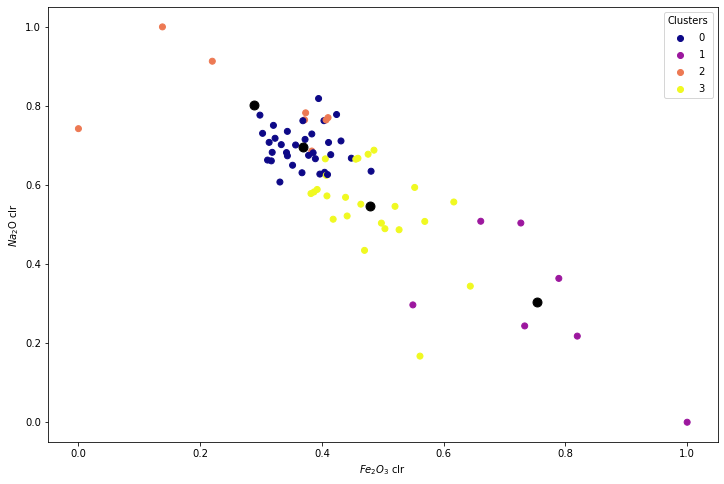

In [20]:
#plotting results using Fe2O3 and Na2O clr data

fig, ax = plt.subplots(figsize=(12,8))

scatter=ax.scatter(X[:,2], X[:,5], c=kmeans.labels_, cmap='plasma')
ax.scatter(kmeans.cluster_centers_[:,2] ,kmeans.cluster_centers_[:,5], color='black', s=80)
ax.set_xlabel('$Fe_2$$O_3$ clr')
ax.set_ylabel('$Na_2$O clr')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [21]:
#Running K means with multiple Ks

no_of_clusters=range(2,20) #[2,3,4,5...]
inertia=[]    #Creates an empty list

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f, random_state=2)
    kmeans=kmeans.fit(X)
    u=kmeans.inertia_
    inertia.append(u)   #This will populate the inertia list with u
    print("The inertia for :", f, "clusters is:", u)

The inertia for : 2 clusters is: 11.106603200138974
The inertia for : 3 clusters is: 7.704457468777136
The inertia for : 4 clusters is: 6.4156139025942105
The inertia for : 5 clusters is: 5.393361522547092
The inertia for : 6 clusters is: 4.769746020918902
The inertia for : 7 clusters is: 4.15812534896777
The inertia for : 8 clusters is: 3.65714456389573
The inertia for : 9 clusters is: 3.279360119555325
The inertia for : 10 clusters is: 2.9781544255693513
The inertia for : 11 clusters is: 2.704630816184623
The inertia for : 12 clusters is: 2.4039109994553556
The inertia for : 13 clusters is: 2.2680765019792646
The inertia for : 14 clusters is: 2.066424473072358
The inertia for : 15 clusters is: 1.9440766581246927
The inertia for : 16 clusters is: 1.8236505427833978
The inertia for : 17 clusters is: 1.7159496248786488
The inertia for : 18 clusters is: 1.6125882237553277
The inertia for : 19 clusters is: 1.5193460939653494


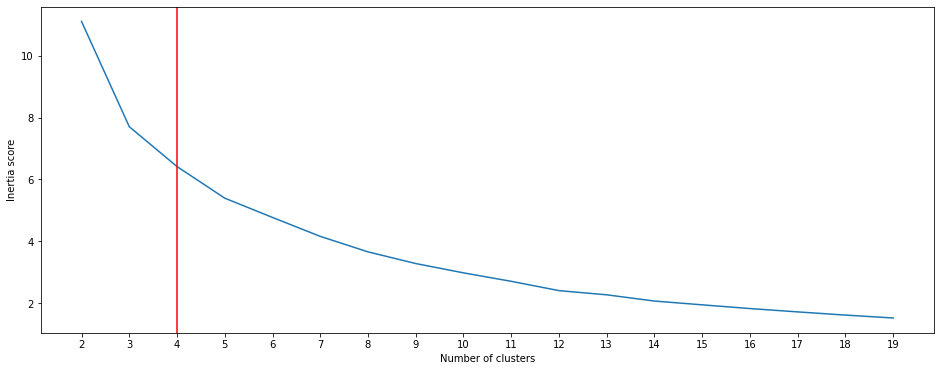

In [22]:
#Making a scree plot of intertia scores

fig, (ax1)=plt.subplots(1, figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')

plt.axvline(2, color='red')   #plot the previous choice of number of clusters

In [23]:
print("The inertia is:", kmeans.inertia_)

The inertia is: 1.5193460939653494


In [24]:
#Running K means on 4 clusters again

kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X)


clusters=kmeans.predict(X)   #normally used for new data, but here it will be applied to the existing data 

#calculating the counts of the clusters
unique, counts=np.unique(kmeans.labels_, return_counts=True)
counts=counts.reshape(1,4) #one row and four columns

#Creating a dataframe
countscldf=pd.DataFrame(counts, columns=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3'])

#display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,36,8,5,23


In [25]:
print(kmeans.labels_)   

[0 0 0 1 0 0 0 0 3 3 3 0 0 0 3 3 3 0 3 2 0 0 1 1 1 1 2 3 1 0 0 0 1 0 1 3 2
 2 3 3 2 0 0 3 3 0 0 3 3 3 3 3 3 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0]


# PCA Analysis

In [26]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Explained variance (first two components): [0.49458461 0.24869052]


<Figure size 432x288 with 0 Axes>

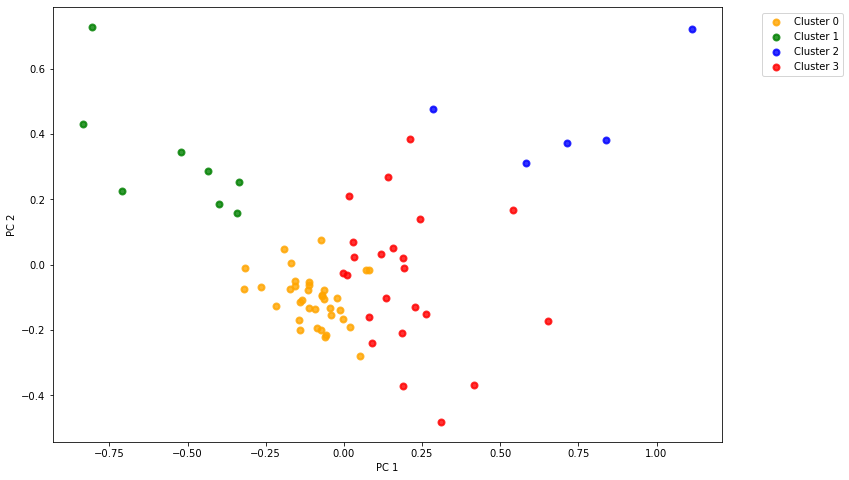

In [27]:
X = X
y_num = clusters    #Clusters are the kmeans labels

target_names = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3']

pca=PCA(n_components=2)    #To visualize the first two components. Option to scale to Unit variance (whiten=True)
X_r=pca.fit(X).transform(X)

#Percentage of variance explained for each component
print('Explained variance (first two components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['orange', 'green', 'blue', 'red']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)  #This is just to put the legend outside the plot
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [28]:
print(X_r)   #PC 1 and PC 2 scores

[[-0.08740032 -0.19507866]
 [-0.11152254 -0.05363188]
 [-0.26518451 -0.06693103]
 [-0.43602173  0.28652627]
 [-0.04300497 -0.13284665]
 [-0.15737459 -0.06523815]
 [-0.31974053 -0.07290752]
 [-0.15619202 -0.04905294]
 [ 0.54013153  0.16816005]
 [ 0.0083986  -0.03088531]
 [ 0.15570604  0.05130313]
 [-0.07193399  0.07474986]
 [ 0.08043207 -0.01539561]
 [ 0.07080882 -0.01640525]
 [ 0.13494179 -0.10080798]
 [ 0.03348048  0.0239086 ]
 [ 0.03049563  0.07030386]
 [-0.16995934  0.00475096]
 [ 0.1397485   0.26812027]
 [ 0.5831553   0.31225383]
 [-0.31619581 -0.01015448]
 [-0.11349706 -0.07670081]
 [-0.39897     0.18414478]
 [-0.34173196  0.158704  ]
 [-0.8062362   0.72798236]
 [-0.51963526  0.34609682]
 [ 1.11268582  0.72120865]
 [ 0.24267687  0.13855875]
 [-0.70966516  0.22529884]
 [-0.07118608 -0.09287294]
 [-0.19264183  0.04937659]
 [-0.0635453  -0.07806812]
 [-0.33527812  0.25369458]
 [-0.02083432 -0.10279519]
 [-0.83455955  0.42971314]
 [ 0.21147113  0.38360295]
 [ 0.71281145  0.37081432]
 

In [29]:
n_components = X.shape[1]

#Running PCA on all components
pca=PCA(n_components=n_components)
X_r=pca.fit(X).transform(X)

#calculating the 95% variance
total_variance = sum(pca.explained_variance_)
print('Total variance in the dataset is:', total_variance)
var_95 = total_variance*0.95
print('The 95% variance is: ', var_95)
print('')

#Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=['PCA Comp', 'Explained Variance'])

#Trying to find 95%... we already know in this case that the first 2 already achieve abut 90%, so let's see
print('Variance explain with 2 n_components:', sum(a['Explained Variance'][0:2]))
print('Variance explain with 3 n_components:', sum(a['Explained Variance'][0:3]))
print('Variance explain with 4 n_components:', sum(a['Explained Variance'][0:4]))
print('Variance explain with 5 n_components:', sum(a['Explained Variance'][0:5]))


Total variance in the dataset is: 0.21866592041671878
The 95% variance is:  0.20773262439588283

Variance explain with 2 n_components: 0.16252893885243916
Variance explain with 3 n_components: 0.18553362175664118
Variance explain with 4 n_components: 0.2055088973835388
Variance explain with 5 n_components: 0.2140355625231802


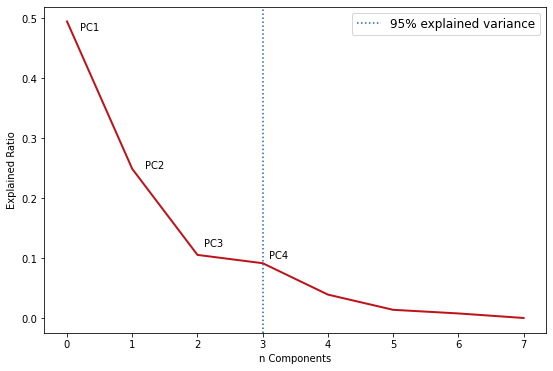

In [30]:
#Plotting the data
plt.figure(1, figsize=(9,6))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c='#bc141a')
plt.xlabel('n Components')
plt.ylabel('Explained Ratio')

#Plotting line with 95% e.v.
plt.axvline(3,linestyle=':', label='95% explained variance', c='#1764ab') 
plt.legend(prop=dict(size=12))
plt.text(0.2, 0.48, 'PC1')        #index starts at 0 and it is PC1
plt.text(1.2, 0.25, 'PC2')
plt.text(2.1, 0.12, 'PC3')
plt.text(3.1, 0.1, 'PC4')
plt.show()

In [31]:
# Running PCA again, this time with 4 components

pca=PCA(n_components=4)
X_r=pca.fit(X).transform(X)

inertia=[]

#Running kmeans after PCA to help improve the kmeans clustering

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for :', f, 'clusters is', u)
    


The inertia for : 2 clusters is 10.176071726504656
The inertia for : 3 clusters is 6.783099919765194
The inertia for : 4 clusters is 5.456229385305516
The inertia for : 5 clusters is 4.536781668199439
The inertia for : 6 clusters is 3.858309018650203
The inertia for : 7 clusters is 3.3742401291740287
The inertia for : 8 clusters is 2.8371737458326196
The inertia for : 9 clusters is 2.4792878307417094
The inertia for : 10 clusters is 2.255669127039129
The inertia for : 11 clusters is 1.9853258130566642
The inertia for : 12 clusters is 1.8374187128554111
The inertia for : 13 clusters is 1.6481413033731163
The inertia for : 14 clusters is 1.4489606733065243
The inertia for : 15 clusters is 1.2988751007869548
The inertia for : 16 clusters is 1.2354955203756157
The inertia for : 17 clusters is 1.1167644281011364
The inertia for : 18 clusters is 1.059779500308684
The inertia for : 19 clusters is 0.9849489365870346


In [32]:
#re-running K means on 4 clusters

kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X_r)

predictions=kmeans.predict(X_r)   #normally used for new data, but here it will be applied to the existing data 

#calculating the counts of the clusters
unique, counts=np.unique(kmeans.labels_, return_counts=True)
counts=counts.reshape(1,4)   #one row and five columns

#Creating a dataframe
countscldf=pd.DataFrame(counts, columns=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,7,43,8,14


In [33]:
print(kmeans.labels_)   

[1 1 1 2 1 1 1 1 0 1 3 1 1 1 3 1 1 1 1 0 1 1 2 2 2 2 0 3 2 1 1 1 2 1 2 0 0
 0 1 1 0 1 1 3 3 1 1 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['Al2O3', 'CaO', 'Fe2O3', 'K2O', 'MgO', 'Na2O', 'P2O5', 'TiO2'])
loadings.index.name='Elements' #To name the index column
loadings['Elements']=loadings.index    #the index is copied on to a new column with column name
loadings = loadings.reset_index(drop=True) #the index replaced with sequence of numbers
loadings

,PC1,PC2,PC3,PC4,Elements
0,-0.242092,0.471322,-0.105981,-0.637273,Al2O3
1,-0.357871,-0.678879,0.197761,-0.202824,CaO
2,0.380580,0.187329,-0.236382,-0.191169,Fe2O3
3,-0.332121,0.083303,-0.242641,0.573441,K2O
4,0.217875,-0.350323,-0.664238,-0.001041,MgO
5,-0.470558,-0.102648,0.034347,-0.269030,Na2O
6,0.416963,-0.041619,0.614794,0.056523,P2O5
7,-0.339738,0.374101,0.120598,0.334353,TiO2


In [35]:
print(pca.components_)

[[-0.24209239 -0.35787093  0.38057971 -0.33212065  0.21787482 -0.47055798
   0.41696338 -0.33973803]
 [ 0.47132232 -0.67887887  0.18732945  0.08330316 -0.35032309 -0.10264845
  -0.04161881  0.37410149]
 [-0.10598143  0.19776085 -0.23638203 -0.24264145 -0.66423837  0.03434725
   0.61479351  0.12059781]
 [-0.63727277 -0.20282441 -0.19116916  0.57344139 -0.00104125 -0.2690301
   0.05652291  0.33435293]]


In [36]:
loadings.index.values

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [37]:
a_=pca.components_.copy()
a_T=a_.T
print(a_T)

[[-0.24209239  0.47132232 -0.10598143 -0.63727277]
 [-0.35787093 -0.67887887  0.19776085 -0.20282441]
 [ 0.38057971  0.18732945 -0.23638203 -0.19116916]
 [-0.33212065  0.08330316 -0.24264145  0.57344139]
 [ 0.21787482 -0.35032309 -0.66423837 -0.00104125]
 [-0.47055798 -0.10264845  0.03434725 -0.2690301 ]
 [ 0.41696338 -0.04161881  0.61479351  0.05652291]
 [-0.33973803  0.37410149  0.12059781  0.33435293]]


In [38]:
a_T[0,0]
a_T[0,1]

0.4713223164044846

## PC Loadings

In [39]:
#import color palettes
import seaborn as sns

#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii

print("Color Brewer Palettes:")

pal = sns.color_palette("Set1", 4)
print("Set 1: ", pal.as_hex())

pal = sns.color_palette("Blues", 4)
print("Blues: ", pal.as_hex())

Color Brewer Palettes:
Set 1:  ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
Blues:  ['#d0e1f2', '#94c4df', '#4a98c9', '#1764ab']


In [40]:
#Sort PC loadings for nicer graphs
#PC1

PC1_sorted=loadings.sort_values(by=['PC1'])
PC1_sorted

,PC1,PC2,PC3,PC4,Elements
5,-0.470558,-0.102648,0.034347,-0.269030,Na2O
1,-0.357871,-0.678879,0.197761,-0.202824,CaO
7,-0.339738,0.374101,0.120598,0.334353,TiO2
3,-0.332121,0.083303,-0.242641,0.573441,K2O
0,-0.242092,0.471322,-0.105981,-0.637273,Al2O3
4,0.217875,-0.350323,-0.664238,-0.001041,MgO
2,0.380580,0.187329,-0.236382,-0.191169,Fe2O3
6,0.416963,-0.041619,0.614794,0.056523,P2O5


In [41]:
#Sort PC loadings for nicer graphs
#PC2

PC2_sorted=loadings.sort_values(by=['PC2'])
PC2_sorted

,PC1,PC2,PC3,PC4,Elements
1,-0.357871,-0.678879,0.197761,-0.202824,CaO
4,0.217875,-0.350323,-0.664238,-0.001041,MgO
5,-0.470558,-0.102648,0.034347,-0.269030,Na2O
6,0.416963,-0.041619,0.614794,0.056523,P2O5
3,-0.332121,0.083303,-0.242641,0.573441,K2O
2,0.380580,0.187329,-0.236382,-0.191169,Fe2O3
7,-0.339738,0.374101,0.120598,0.334353,TiO2
0,-0.242092,0.471322,-0.105981,-0.637273,Al2O3


In [42]:
#Sort PC loadings for nicer graphs
#PC3

PC3_sorted=loadings.sort_values(by=['PC3'])
PC3_sorted

,PC1,PC2,PC3,PC4,Elements
4,0.217875,-0.350323,-0.664238,-0.001041,MgO
3,-0.332121,0.083303,-0.242641,0.573441,K2O
2,0.380580,0.187329,-0.236382,-0.191169,Fe2O3
0,-0.242092,0.471322,-0.105981,-0.637273,Al2O3
5,-0.470558,-0.102648,0.034347,-0.269030,Na2O
7,-0.339738,0.374101,0.120598,0.334353,TiO2
1,-0.357871,-0.678879,0.197761,-0.202824,CaO
6,0.416963,-0.041619,0.614794,0.056523,P2O5


In [43]:
#Sort PC loadings for nicer graphs
#PC4

PC4_sorted=loadings.sort_values(by=['PC4'])
PC4_sorted

,PC1,PC2,PC3,PC4,Elements
0,-0.242092,0.471322,-0.105981,-0.637273,Al2O3
5,-0.470558,-0.102648,0.034347,-0.269030,Na2O
1,-0.357871,-0.678879,0.197761,-0.202824,CaO
2,0.380580,0.187329,-0.236382,-0.191169,Fe2O3
4,0.217875,-0.350323,-0.664238,-0.001041,MgO
6,0.416963,-0.041619,0.614794,0.056523,P2O5
7,-0.339738,0.374101,0.120598,0.334353,TiO2
3,-0.332121,0.083303,-0.242641,0.573441,K2O


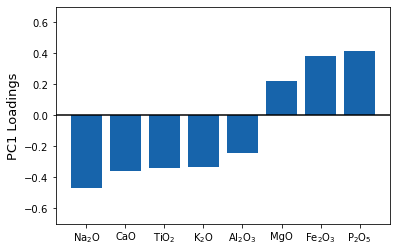

In [44]:
#PC loadings

#Set x-axis labels
bars = ('$\mathregular{Na_2O}$', 'CaO', '$\mathregular{TiO_2}$', '$\mathregular{K_2O}$', '$\mathregular{Al_2O_3}$', 'MgO', '$\mathregular{Fe_2O_3}$', 
       '$\mathregular{P_2O_5}$')

plt.bar(bars, PC1_sorted['PC1'], linewidth=2., color='#1764ab')

plt.ylim((-0.7, 0.7)) 
plt.ylabel('PC1 Loadings', fontsize=13)
plt.axhline(0,linestyle='-', c='black')

plt.show()


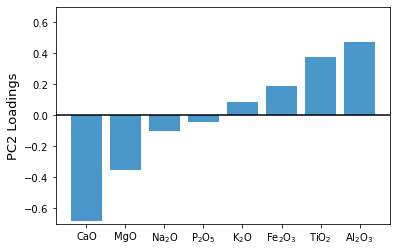

In [45]:
bars = ('CaO', 'MgO', '$\mathregular{Na_2O}$', '$\mathregular{P_2O_5}$', '$\mathregular{K_2O}$', '$\mathregular{Fe_2O_3}$',
       '$\mathregular{TiO_2}$', '$\mathregular{Al_2O_3}$')

plt.bar(bars, PC2_sorted['PC2'], linewidth=2., color='#4a98c9')
plt.ylim((-0.7, 0.7))  
plt.ylabel('PC2 Loadings', fontsize=13)
plt.axhline(0,linestyle='-', c='black')

plt.show()



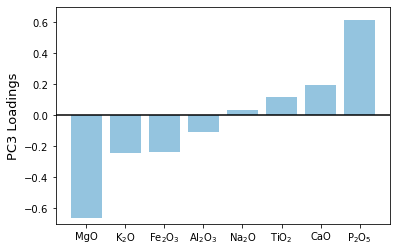

In [46]:
bars = ('MgO', '$\mathregular{K_2O}$', '$\mathregular{Fe_2O_3}$', '$\mathregular{Al_2O_3}$', '$\mathregular{Na_2O}$', '$\mathregular{TiO_2}$', 'CaO', 
       '$\mathregular{P_2O_5}$')

plt.bar(bars, PC3_sorted['PC3'], linewidth=2., color='#94c4df')
plt.ylim((-0.7, 0.7)) 
plt.ylabel('PC3 Loadings', fontsize=13)
plt.axhline(0,linestyle='-', c='black')

plt.show()

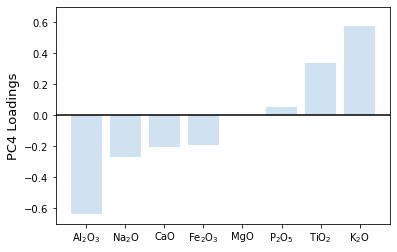

In [47]:
bars = ('$\mathregular{Al_2O_3}$', '$\mathregular{Na_2O}$', 'CaO', '$\mathregular{Fe_2O_3}$', 'MgO',
       '$\mathregular{P_2O_5}$', '$\mathregular{TiO_2}$', '$\mathregular{K_2O}$')

plt.bar(bars, PC4_sorted['PC4'], linewidth=2., color='#d0e1f2')
plt.ylim((-0.7, 0.7)) 
plt.ylabel('PC4 Loadings', fontsize=13)
plt.axhline(0,linestyle='-', c='black')

plt.show()

## PC biplots

In [48]:
#display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,7,43,8,14


In [49]:
print(kmeans.labels_) 

[1 1 1 2 1 1 1 1 0 1 3 1 1 1 3 1 1 1 1 0 1 1 2 2 2 2 0 3 2 1 1 1 2 1 2 0 0
 0 1 1 0 1 1 3 3 1 1 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1]


Explained variance (first four components): [0.49458461 0.24869052 0.1052047  0.09135066]


<Figure size 432x288 with 0 Axes>

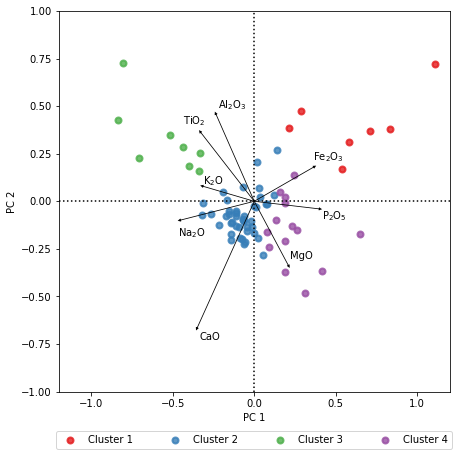

In [64]:
#PC1 vs PC2
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
print('Explained variance (first four components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 V. pc2)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    

#format legend
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=4,
           columnspacing=3.2)


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-1.2,1.2)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
Al2O3_Xdirect= a_T[0,0]
Al2O3_Ydirect= a_T[0,1]
CaO_Xdirect= a_T[1,0]
CaO_Ydirect= a_T[1,1]
Fe2O3_Xdirect= a_T[2,0]
Fe2O3_Ydirect= a_T[2,1]
K2O_Xdirect= a_T[3,0]
K2O_Ydirect= a_T[3,1]
MgO_Xdirect= a_T[4,0]
MgO_Ydirect= a_T[4,1]
Na2O_Xdirect= a_T[5,0]
Na2O_Ydirect= a_T[5,1]
P2O5_Xdirect= a_T[6,0]
P2O5_Ydirect= a_T[6,1]
TiO2_Xdirect= a_T[7,0]
TiO2_Ydirect= a_T[7,1]

plt.quiver(x_pos,y_pos,Al2O3_Xdirect,Al2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Fe2O3_Xdirect,Fe2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,MgO_Xdirect,MgO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,CaO_Xdirect,CaO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Na2O_Xdirect,Na2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,TiO2_Xdirect,TiO2_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,P2O5_Xdirect,P2O5_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, K2O_Xdirect, K2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0]+0.02, a_T[0,1]+0.02, '$\mathregular{Al_2O_3}$')
plt.text(a_T[1,0]+0.02, a_T[1,1]-0.05, 'CaO')
plt.text(a_T[2,0]-0.02, a_T[2,1]+0.03, '$\mathregular{Fe_2O_3}$')
plt.text(a_T[3,0]+0.02, a_T[3,1]+0.01, '$\mathregular{K_2O}$')
plt.text(a_T[4,0], a_T[4,1]+0.05, 'MgO')
plt.text(a_T[5,0], a_T[5,1]-0.08, '$\mathregular{Na_2O}$')
plt.text(a_T[6,0], a_T[6,1]-0.05, '$\mathregular{P_2O_5}$')
plt.text(a_T[7,0]-0.1, a_T[7,1]+0.03, '$\mathregular{TiO_2}$')

plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
#plt.savefig('PC1_2_Malartic.pdf')
plt.savefig('PC1_2_Malartic', transparent=False, bbox_inches='tight')
plt.show()



Explained variance (first four components): [0.49458461 0.24869052 0.1052047  0.09135066]


<Figure size 432x288 with 0 Axes>

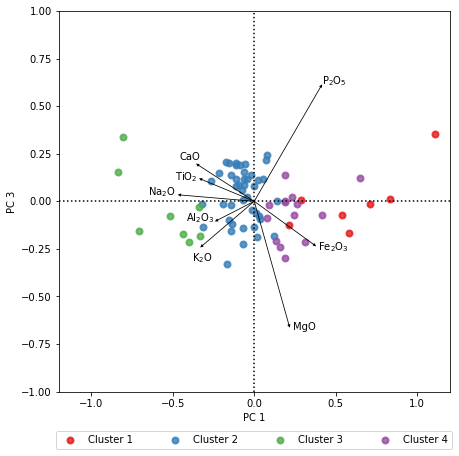

In [71]:
#PC1 vs PC3
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
print('Explained variance (first four components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 v. pc3)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 2], color=color, alpha=.8, lw=lw, label=target_name)

#format legend
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=4,
           columnspacing=3.2)
    
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.xlim(-1.2,1.2)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
Al2O3_Xdirect= a_T[0,0]
Al2O3_Ydirect= a_T[0,2]
CaO_Xdirect= a_T[1,0]
CaO_Ydirect= a_T[1,2]
Fe2O3_Xdirect= a_T[2,0]
Fe2O3_Ydirect= a_T[2,2]
K2O_Xdirect= a_T[3,0]
K2O_Ydirect= a_T[3,2]
MgO_Xdirect= a_T[4,0]
MgO_Ydirect= a_T[4,2]
Na2O_Xdirect= a_T[5,0]
Na2O_Ydirect= a_T[5,2]
P2O5_Xdirect= a_T[6,0]
P2O5_Ydirect= a_T[6,2]
TiO2_Xdirect= a_T[7,0]
TiO2_Ydirect= a_T[7,2]

plt.quiver(x_pos,y_pos,Al2O3_Xdirect,Al2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Fe2O3_Xdirect,Fe2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,MgO_Xdirect,MgO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,CaO_Xdirect,CaO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Na2O_Xdirect,Na2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,TiO2_Xdirect,TiO2_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,P2O5_Xdirect,P2O5_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, K2O_Xdirect, K2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0]-0.18, a_T[0,2], '$\mathregular{Al_2O_3}$')
plt.text(a_T[1,0]-0.1, a_T[1,2]+0.02, 'CaO')
plt.text(a_T[2,0]+0.01, a_T[2,2]-0.02, '$\mathregular{Fe_2O_3}$')
plt.text(a_T[3,0]-0.05, a_T[3,2]-0.07, '$\mathregular{K_2O}$')
plt.text(a_T[4,0]+0.02, a_T[4,2]-0.01, 'MgO')
plt.text(a_T[5,0]-0.18, a_T[5,2], '$\mathregular{Na_2O}$')
plt.text(a_T[6,0], a_T[6,2], '$\mathregular{P_2O_5}$')
plt.text(a_T[7,0]-.15, a_T[7,2]-0.01, '$\mathregular{TiO_2}$')
plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
#plt.savefig('PC1_3_Malartic.pdf')
plt.savefig('PC1_3_Malartic', transparent=False, bbox_inches='tight')
plt.show()


Explained variance (first four components): [0.49458461 0.24869052 0.1052047  0.09135066]


<Figure size 432x288 with 0 Axes>

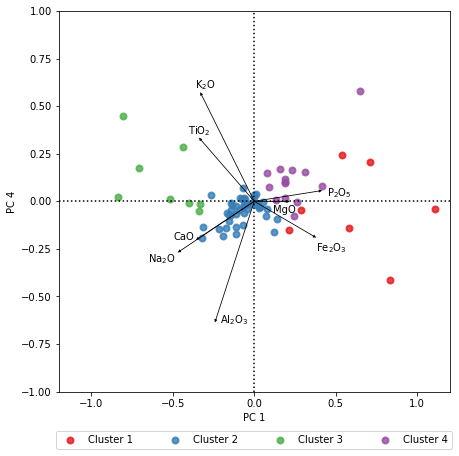

In [96]:
#PC1 vs PC4
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
print('Explained variance (first four components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 v. pc4)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 3], color=color, alpha=.8, lw=lw, label=target_name)

#plt.legend(loc='lower right', shadow=False, scatterpoints=1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)  
#This would used to put the legend outside the plot

#format legend
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=4,
           columnspacing=3.2)

plt.xlabel('PC 1')
plt.ylabel('PC 4')
plt.xlim(-1.2,1.2)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
Al2O3_Xdirect= a_T[0,0]
Al2O3_Ydirect= a_T[0,3]
CaO_Xdirect= a_T[1,0]
CaO_Ydirect= a_T[1,3]
Fe2O3_Xdirect= a_T[2,0]
Fe2O3_Ydirect= a_T[2,3]
K2O_Xdirect= a_T[3,0]
K2O_Ydirect= a_T[3,3]
MgO_Xdirect= a_T[4,0]
MgO_Ydirect= a_T[4,3]
Na2O_Xdirect= a_T[5,0]
Na2O_Ydirect= a_T[5,3]
P2O5_Xdirect= a_T[6,0]
P2O5_Ydirect= a_T[6,3]
TiO2_Xdirect= a_T[7,0]
TiO2_Ydirect= a_T[7,3]

plt.quiver(x_pos,y_pos,Al2O3_Xdirect,Al2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Fe2O3_Xdirect,Fe2O3_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,MgO_Xdirect,MgO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,CaO_Xdirect,CaO_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Na2O_Xdirect,Na2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,TiO2_Xdirect,TiO2_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,P2O5_Xdirect,P2O5_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, K2O_Xdirect, K2O_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0]+0.03, a_T[0,3], '$\mathregular{Al_2O_3}$')
plt.text(a_T[1,0]-0.14, a_T[1,3], 'CaO')
plt.text(a_T[2,0], a_T[2,3]-0.07, '$\mathregular{Fe_2O_3}$')
plt.text(a_T[3,0]-0.03, a_T[3,3]+0.02, '$\mathregular{K_2O}$')
plt.text(a_T[4,0]-0.1, a_T[4,3]-0.06, 'MgO')
plt.text(a_T[5,0]-0.18, a_T[5,3]-0.05, '$\mathregular{Na_2O}$')
plt.text(a_T[6,0]+0.03, a_T[6,3]-0.03, '$\mathregular{P_2O_5}$')
plt.text(a_T[7,0]-0.07, a_T[7,3]+0.02, '$\mathregular{TiO_2}$')
plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
#plt.savefig('PC1_4_Malartic.pdf')
plt.savefig('PC1_4_Malartic', transparent=False, bbox_inches='tight')
plt.show()

## k-means labels for QGIS

In [53]:
#Create dataframe from kmeans labels
df2 = pd.DataFrame(kmeans.labels_)  

print(df2)

    0
0   1
1   1
2   1
3   2
4   1
.. ..
67  1
68  1
69  1
70  1
71  1

[72 rows x 1 columns]


In [54]:
#Add kmeans labels to main dataframe

df3 = pd.concat([df, df2], axis=1)

print(df3)

#Export dataframe as .csv file
#df3.to_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\major_oxide_kmeans.csv') 

   Sample_ID   Oxidation       X        Y  Year     Type          Sample  \
0       001a      Slight  712587  5331728  2016  Surface  Surface (2016)   
1       004a      Slight  706551  5333381  2016  Surface  Surface (2016)   
2       005a      Slight  706274  5325153  2016  Surface  Surface (2016)   
3       007a      Slight  716966  5323165  2016  Surface  Surface (2016)   
4       009a      Slight  718028  5338822  2016  Surface  Surface (2016)   
..       ...         ...     ...      ...   ...      ...             ...   
67      SS 5      Slight  708031  5332341  2015  Surface  Surface (2015)   
68      SS 6      Slight  712580  5331733  2015  Surface  Surface (2015)   
69      SS 7      Slight  710245  5335036  2015  Surface  Surface (2015)   
70      SS 8      Slight  709807  5333816  2015  Surface  Surface (2015)   
71      SS 9  Unapparent  711255  5332859  2015  Surface  Surface (2015)   

    Al2O3   CaO  Fe2O3  ...    MnO  Na2O   P2O5   TiO2  Depth_m  \
0    13.3  3.82   3.